In [24]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [25]:
df = pd.read_excel("D:/BTP/Yerli/variables.xlsx")
df

,Discharge,RF16,RF17,RF38,RF39,RF40,RF59,RF60,RF61,RF62,...,RF125,RF126,LRF,T4,T5,T10,T11,LT,c1,c2
0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.1,...,0.0,0.0,0.283190,35.30,35.75,35.10,34.75,35.19770,0.000000,0.000000
1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.018502,35.30,35.75,35.25,35.05,35.33585,0.000000,0.000000
2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.7,0.6,1.291675,34.25,33.75,35.00,33.95,34.27155,0.000000,0.000000
3,0.2,0.0,0.6,1.3,1.6,0.0,0.6,0.0,0.0,0.0,...,0.0,0.0,1.771333,33.60,32.95,34.65,33.00,33.59125,0.041725,0.143348
4,0.2,15.8,11.9,21.9,4.6,3.6,5.3,1.5,1.1,0.0,...,0.0,0.0,7.110623,32.15,32.70,33.45,33.00,32.98680,0.275029,1.706600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,0.0,0.0,0.073053,33.25,33.30,32.80,32.40,32.86425,0.000000,0.004532
17528,0.0,0.0,0.1,4.3,1.2,0.0,0.0,0.0,0.0,0.0,...,2.9,0.0,0.820913,32.95,33.30,33.15,32.95,33.11460,0.041967,0.000000
17529,0.0,0.0,0.2,0.8,0.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.307082,33.40,34.05,34.00,33.30,33.75240,0.007262,0.000000
17530,0.0,15.8,21.5,2.7,0.7,0.6,3.7,1.2,4.0,4.7,...,0.0,0.0,3.300925,31.20,31.65,31.75,32.25,31.81785,0.041224,0.058400


In [26]:
def pearson(X,Y):
    if len(X)==len(Y):
        Sum_xy = sum((X-X.mean())*(Y-Y.mean()))
        Sum_x_squared = sum((X-X.mean())**2)
        Sum_y_squared = sum((Y-Y.mean())**2)       
        corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
    return corr

In [27]:
arr = []
for i in df:
    arr.append([pearson(df[i],df.Discharge),i])
arr.sort()
arr

[[-0.0608913854243064, 'T4'],
 [-0.06055728104504908, 'T5'],
 [-0.041779885768510265, 'LT'],
 [-0.03541053396382134, 'T10'],
 [-0.02652056904613815, 'T11'],
 [0.21999299711036555, 'RF126'],
 [0.22833074590474037, 'RF64'],
 [0.24566439919166394, 'RF63'],
 [0.25411993330720456, 'RF62'],
 [0.25959430539846234, 'RF84'],
 [0.26414872163882425, 'RF83'],
 [0.2720437127966615, 'RF65'],
 [0.2762275408424028, 'RF125'],
 [0.2916091970189534, 'RF61'],
 [0.29559565810908106, 'RF16'],
 [0.30503582921638717, 'RF124'],
 [0.30925687301566196, 'RF60'],
 [0.31348268218866715, 'RF113'],
 [0.327835831179796, 'RF82'],
 [0.3314630000162973, 'RF116'],
 [0.3355620998814092, 'RF59'],
 [0.33721555427021893, 'RF17'],
 [0.337523341302307, 'RF112'],
 [0.34181604899802337, 'RF117'],
 [0.34445468626084463, 'RF101'],
 [0.34988933932333305, 'RF81'],
 [0.35144744019504726, 'RF123'],
 [0.35773934560238796, 'RF80'],
 [0.3651165202278776, 'RF40'],
 [0.37444263696710695, 'RF39'],
 [0.3750261270647518, 'RF100'],
 [0.37728041

In [28]:
arr = []
def printing(ccf):
    for i in range(10):
        print(round(ccf[i],6), end = "   ")  
for i in df:
    print(i)
    ccf = sm.tsa.stattools.ccf(df.Discharge, df[i], adjusted=False)
    arr.append(ccf)
    printing(ccf)
    print()
res = pd.DataFrame(arr).T
res.to_excel('cross correlation yerli.xlsx')

Discharge
1.0   0.687893   0.420589   0.302046   0.283386   0.264813   0.235323   0.219417   0.204023   0.178003   
RF16
0.295596   0.329238   0.255262   0.182923   0.168655   0.169554   0.155485   0.153939   0.16166   0.15327   
RF17
0.337216   0.376054   0.287238   0.203408   0.182617   0.179702   0.165301   0.173689   0.174938   0.163255   
RF38
0.37728   0.527636   0.421406   0.250209   0.200157   0.193568   0.176613   0.162277   0.168932   0.163431   
RF39
0.374443   0.566163   0.403344   0.242648   0.203879   0.200907   0.181876   0.161583   0.162629   0.162968   
RF40
0.365117   0.567237   0.393294   0.241768   0.202887   0.200729   0.169578   0.149427   0.15004   0.154151   
RF59
0.335562   0.547134   0.426141   0.259494   0.212348   0.199951   0.179229   0.168137   0.170673   0.169599   
RF60
0.309257   0.530153   0.430089   0.267621   0.20809   0.188392   0.175768   0.17587   0.178509   0.179816   
RF61
0.291609   0.507307   0.428891   0.269069   0.214392   0.199795   0.18632

Text(0, 0.5, 'Correlation')

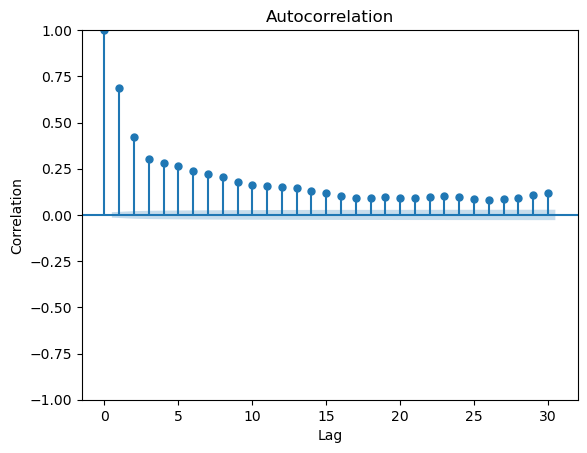

In [29]:
sm.graphics.tsa.plot_acf(df['Discharge'].values.squeeze(), lags=30)
plt.xlabel('Lag')
plt.ylabel('Correlation')

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


Text(0, 0.5, 'Correlation')

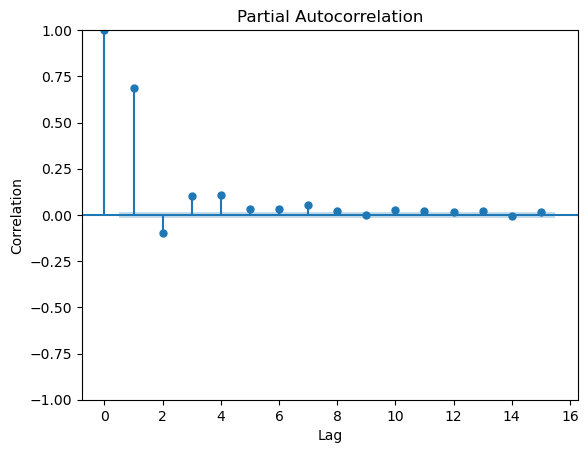

In [30]:
sm.graphics.tsa.plot_pacf(df['Discharge'].values.squeeze(), lags=15)
plt.xlabel('Lag')
plt.ylabel('Correlation')

## Feature Importance

In [31]:
x=df.drop(columns = ["Discharge"])
y=df.Discharge

In [32]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)
k = model.feature_importances_

In [33]:
k

array([0.0160539 , 0.02042877, 0.02673006, 0.01976596, 0.02232845,
       0.01729936, 0.01837555, 0.0149092 , 0.01494467, 0.02225997,
       0.02060539, 0.03438611, 0.03282384, 0.01935265, 0.01278756,
       0.01439101, 0.01412139, 0.01460646, 0.01242995, 0.03291742,
       0.02575002, 0.02230355, 0.02844964, 0.02533626, 0.01973469,
       0.01833293, 0.0252078 , 0.03242175, 0.02094885, 0.03618272,
       0.01554026, 0.01514722, 0.02214436, 0.01650057, 0.01101729,
       0.01311854, 0.08459476, 0.03488753, 0.0254151 , 0.01970448,
       0.02092451, 0.02140121, 0.02595492, 0.01746339])

In [34]:
p = df.columns
l = []
for i in range(p.size-1):
    l.append([k[i],p[i+1]])
l.sort()
for m in l:
    print(m)

[0.011017286051046403, 'RF125']
[0.012429946744042257, 'RF84']
[0.012787556154386884, 'RF80']
[0.013118537587955696, 'RF126']
[0.014121393562423654, 'RF82']
[0.014391009555093776, 'RF81']
[0.014606460794065357, 'RF83']
[0.014909196215617586, 'RF61']
[0.014944666104283768, 'RF62']
[0.015147216698415202, 'RF117']
[0.0155402605045915, 'RF116']
[0.016053901390370565, 'RF16']
[0.016500567494045864, 'RF124']
[0.017299358672367645, 'RF59']
[0.017463386315582106, 'c2']
[0.018332934541752513, 'RF101']
[0.018375554164629923, 'RF60']
[0.019352653025317666, 'RF79']
[0.019704477403531716, 'T10']
[0.01973469164370708, 'RF100']
[0.019765957835998077, 'RF39']
[0.02042877202712934, 'RF17']
[0.02060539073929299, 'RF64']
[0.02092451401775195, 'T11']
[0.02094884914730672, 'RF114']
[0.02140120972343329, 'LT']
[0.02214435940662026, 'RF123']
[0.022259970114403595, 'RF63']
[0.022303547581246672, 'RF97']
[0.022328446061411055, 'RF40']
[0.025207799409767716, 'RF112']
[0.025336261990394637, 'RF99']
[0.0254150970

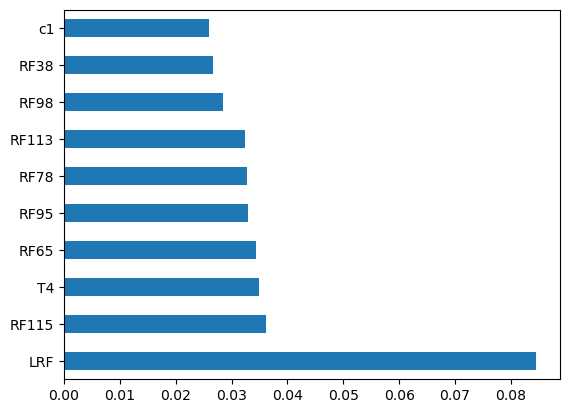

In [35]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [36]:
# import seaborn as sns
# #get correlations of each features in dataset
# corrmat = df.corr()
# top_corr_features = corrmat.index
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")